In [ ]:
# import torch
# num_of_gpus = torch.cuda.device_count()
# print(num_of_gpus)

In [ ]:
# import torch

# device = torch.device("cuda:0")
# device_properties = torch.cuda.get_device_properties(device)

# print(f"Total memory available: {device_properties.total_memory / 1024**2:.2f} MB")

In [ ]:
# # initialize a tensor on the GPU
# x = torch.randn(1000, 1000).cuda()

# # measure the amount of memory used by the tensor
# memory_used = torch.cuda.max_memory_allocated() / 1024**2  # convert to MB

# print(f"Memory used: {memory_used:.2f} MB")

In [ ]:
%pip install transformers
%pip install datasets
%pip install umap-learn
%pip install sentencepiece
%pip install emoji
%pip install num2words
%pip install nltk
%pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 24.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 10.5 MB/s eta 0:00:0

In [ ]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
from transformers import AutoModelForSequenceClassification
from datasets import load_dataset
from transformers import AutoTokenizer, AutoConfig
from transformers import AutoModel
from torch import torch
from torch.nn.functional import cross_entropy
import pandas as pd
import matplotlib.pyplot as plt

from datasets import Dataset, DatasetDict
from datasets import ClassLabel, concatenate_datasets
from datasets import Dataset, ClassLabel, Features, Value
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import datasets
import pandas as pd


# para construir gráficas y realizar análisis exploratorio de los datos
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

# para cargar datos y realizar pre-procesamiento básico
from collections import Counter

#Libraries for classification algorithms, tokenizers, etc.
import nltk
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig, TFDistilBertMainLayer
from nltk.tokenize import word_tokenize
import string as st
import re
from nltk import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SpanishStemmer
from nltk.corpus import sentiwordnet as swn

import emoji
from num2words import num2words

# Cargamos esta librería para revisar el desbalance que existe en el dataset de tripadvisor
from imblearn.under_sampling import RandomUnderSampler

# For Dataaugmentation
from transformers import set_seed
import nlpaug.augmenter.word as naw

In [ ]:
nltk.download('punkt')

nltk.download('stopwords')

nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# DECLARACIÓN DE FUNCIONES Y VARIABLES GLOBALES

In [ ]:
EMOTICONS_EMO = {
    u":‑)":"Cara feliz o smiley",
    u":-))":"Cara muy feliz o sonriente",
    u":-)))":"Cara muy muy feliz o sonriente",
    u":)":"Cara feliz o smiley",
    u":))":"Cara muy feliz o sonriente",
    u":)))":"Cara muy muy feliz o sonriente",
    u":-]":"Cara feliz o smiley",
    u":]":"Cara feliz o smiley",
    u":-3":"Cara feliz Smiley",
    u":3":"Cara feliz Smiley",
    u":->":"Cara feliz Smiley",
    u":>":"Cara feliz Smiley",
    u"8-)":"Cara feliz Smiley",
    u":o)":"Cara feliz Smiley",
    u":-}":"Cara feliz Smiley",
    u":}":"Cara feliz Smiley",
    u":-)":"Cara feliz Smiley",
    u":c)":"Cara feliz Smiley",
    u":^)":"Cara feliz Smiley",
    u"=]":"Cara feliz Smiley",
    u"=)":"Cara feliz Smiley",
    u":‑D":"Riendo, gran sonrisa o risa con gafas",
    u":D":"Riendo, gran sonrisa o risa con gafas",
    u"8‑D":"Riendo, gran sonrisa o risa con gafas",
    u"8D":"Riendo, gran sonrisa o risa con gafas",
    u"X‑D":"Riendo, gran sonrisa o risa con gafas",
    u"XD":"Riendo, gran sonrisa o risa con gafas",
    u"=D":"Riendo, gran sonrisa o risa con gafas",
    u"=3":"Riendo, gran sonrisa o risa con gafas",
    u"B^D":"Riendo, gran sonrisa o risa con gafas",
    u":-))":"Muy feliz",
    u":-(":"Fruncir el ceño, triste, enojado o puchero",
    u":‑(":"Fruncir el ceño, triste, enojado o puchero",
    u":(":"Fruncir el ceño, triste, enojado o puchero",
    u":‑c":"Fruncir el ceño, triste, enojado o puchero",
    u":c":"Fruncir el ceño, triste, enojado o puchero",
    u":‑<":"Fruncir el ceño, triste, enojado o puchero",
    u":<":"Fruncir el ceño, triste, enojado o puchero",
    u":‑[":"Fruncir el ceño, triste, enojado o puchero",
    u":[":"Fruncir el ceño, triste, enojado o puchero",
    u":-||":"Fruncir el ceño, triste, enojado o puchero",
    u">:[":"Fruncir el ceño, triste, enojado o puchero",
    u":{":"Fruncir el ceño, triste, enojado o puchero",
    u":@":"Fruncir el ceño, triste, enojado o puchero",
    u">:(":"Fruncir el ceño, triste, enojado o puchero",
    u":'‑(":"Llanto",
    u":'(":"Llanto",
    u":'‑)":"Lagrimas de felicidad",
    u":')":"Lagrimas de felicidad",
    u"D‑':":"Horror",
    u"D:<":"Asco",
    u"D:":"Tristeza",
    u"D8":"Gran consternación",
    u"D;":"Gran consternación",
    u"D=":"Gran consternación",
    u"DX":"Gran consternación",
    u":‑O":"Sorpresa",
    u":O":"Sorpresa",
    u":‑o":"Sorpresa",
    u":o":"Sorpresa",
    u":-0":"Choque",
    u"8‑0":"Bostezo",
    u">:O":"Bostezo",
    u":-*":"Beso",
    u":*":"Beso",
    u":X":"Beso",
    u";‑)":"Guiño o sonríe",
    u";)":"Guiño o sonríe",
    u"*-)":"Guiño o sonríe",
    u"*)":"Guiño o sonríe",
    u";‑]":"Guiño o sonríe",
    u";]":"Guiño o sonríe",
    u";^)":"Guiño o sonríe",
    u":‑,":"Guiño o sonríe",
    u";D":"Guiño o sonríe",
    u":‑P":"Lengua sobresaliendo, descarada, juguetona o soplando una frambuesa",
    u":P":"Lengua sobresaliendo, descarada, juguetona o soplando una frambuesa",
    u"X‑P":"Lengua sobresaliendo, descarada, juguetona o soplando una frambuesa",
    u"XP":"Lengua sobresaliendo, descarada, juguetona o soplando una frambuesa",
    u":‑Þ":"Lengua sobresaliendo, descarada, juguetona o soplando una frambuesa",
    u":Þ":"Lengua sobresaliendo, descarada, juguetona o soplando una frambuesa",
    u":b":"Lengua sobresaliendo, descarada, juguetona o soplando una frambuesa",
    u"d:":"Lengua sobresaliendo, descarada, juguetona o soplando una frambuesa",
    u"=p":"Lengua sobresaliendo, descarada, juguetona o soplando una frambuesa",
    u">:P":"Lengua sobresaliendo, descarada, juguetona o soplando una frambuesa",
    u":‑/":"Escéptico, molesto, indeciso, incómodo o vacilante",
    u":/":"Escéptico, molesto, indeciso, incómodo o vacilante",
    u":-[.]":"Escéptico, molesto, indeciso, incómodo o vacilante",
    u">:[(\)]":"Escéptico, molesto, indeciso, incómodo o vacilante",
    u">:/":"Escéptico, molesto, indeciso, incómodo o vacilante",
    u":[(\)]":"Escéptico, molesto, indeciso, incómodo o vacilante",
    u"=/":"Escéptico, molesto, indeciso, incómodo o vacilante",
    u"=[(\)]":"Escéptico, molesto, indeciso, incómodo o vacilante",
    u":L":"Escéptico, molesto, indeciso, incómodo o vacilante",
    u"=L":"Escéptico, molesto, indeciso, incómodo o vacilante",
    u":S":"Escéptico, molesto, indeciso, incómodo o vacilante",
    u":‑|":"Cara seria",
    u":|":"Cara seria",
    u":$":"Avergonzado o sonrojo",
    u":‑x":"Labios sellados o con aparatos ortopédicos o lengua",
    u":x":"Labios sellados o con aparatos ortopédicos o lengua",
    u":‑#":"Labios sellados o con aparatos ortopédicos o lengua",
    u":#":"Labios sellados o con aparatos ortopédicos o lengua",
    u":‑&":"Labios sellados o con aparatos ortopédicos o lengua",
    u":&":"Labios sellados o con aparatos ortopédicos o lengua",
    u"O:‑)":"Ángel, santo o inocente",
    u"O:)":"Ángel, santo o inocente",
    u"0:‑3":"Ángel, santo o inocente",
    u"0:3":"Ángel, santo o inocente",
    u"0:‑)":"Ángel, santo o inocente",
    u"0:)":"Ángel, santo o inocente",
    u":‑b":"Lengua sobresaliendo, descarada, juguetona o soplando una frambuesa",
    u"0;^)":"Ángel, santo o inocente",
    u">:‑)":"Malvado o diabólico",
    u">:)":"Malvado o diabólico",
    u"}:‑)":"Malvado o diabólico",
    u"}:)":"Malvado o diabólico",
    u"3:‑)":"Malvado o diabólico",
    u"3:)":"Malvado o diabólico",
    u">;)":"Malvado o diabólico",
    u"|;‑)":"Fresco",
    u"|‑O":"Aburrido",
    u":‑J":"Irónico",
    u"#‑)":"Fiesta toda la noche",
    u"%‑)":"Borracho o confundido",
    u"%)":"Borracho o confundido",
    u":-###..":"Estar enferma",
    u":###..":"Estar enferma",
    u"<:‑|":"Vertedero",
    u"(>_<)":"Preocupado",
    u"(>_<)>":"Preocupado",
    u"(';')":"Bebé",
    u"(^^>``":"Nervioso o avergonzado o problemático o tímido o gota de sudor",
    u"(^_^;)":"Nervioso o avergonzado o problemático o tímido o gota de sudor",
    u"(-_-;)":"Nervioso o avergonzado o problemático o tímido o gota de sudor",
    u"(~_~;) (・.・;)":"Nervioso o avergonzado o problemático o tímido o gota de sudor",
    u"(-_-)zzz":"Durmiendo",
    u"(^_-)":"Guiño",
    u"((+_+))":"Confundido",
    u"(+o+)":"Confundido",
    u"(o|o)":"Ultramán",
    u"^_^":"Alegre",
    u"(^_^)/":"Alegre",
    u"(^O^)／":"Alegre",
    u"(^o^)／":"Alegre",
    u"(__)":"Kowtow como signo de respeto, o dogeza para disculpas",
    u"_(._.)_":"Kowtow como signo de respeto, o dogeza para disculpas",
    u"<(_ _)>":"Kowtow como signo de respeto, o dogeza para disculpas",
    u"<m(__)m>":"Kowtow como signo de respeto, o dogeza para disculpas",
    u"m(__)m":"Kowtow como signo de respeto, o dogeza para disculpas",
    u"m(_ _)m":"Kowtow como signo de respeto, o dogeza para disculpas",
    u"('_')":"Triste o llorando",
    u"(/_;)":"Triste o llorando",
    u"(T_T) (;_;)":"Triste o llorando",
    u"(;_;":"Triste por llorar",
    u"(;_:)":"Triste o llorando",
    u"(;O;)":"Triste o llorando",
    u"(:_;)":"Triste o llorando",
    u"(ToT)":"Triste o llorando",
    u";_;":"Triste o llorando",
    u";-;":"Triste o llorando",
    u";n;":"Triste o llorando",
    u";;":"Triste o llorando",
    u"Q.Q":"Triste o llorando",
    u"T.T":"Triste o llorando",
    u"QQ":"Triste o llorando",
    u"Q_Q":"Triste o llorando",
    u"(-.-)":"Lástima",
    u"(-_-)":"Lástima",
    u"(一一)":"Lástima",
    u"(；一_一)":"Lástima",
    u"(=_=)":"Cansado",
    u"(=^·^=)":"gato",
    u"(=^··^=)":"gato",
    u"=_^= ":"gato",
    u"(..)":"Mirando abajo",
    u"(._.)":"Mirando abajo",
    u"^m^":"Reír con la boca cubierta de mano",
    u"(・・?":"Confusión",
    u"(?_?)":"Confusión",
    u">^_^<":"Risa normal",
    u"<^!^>":"Risa normal",
    u"^/^":"Risa normal",
    u"（*^_^*）" :"Risa normal",
    u"(^<^) (^.^)":"Risa normal",
    u"(^^)":"Risa normal",
    u"(^.^)":"Risa normal",
    u"(^_^.)":"Risa normal",
    u"(^_^)":"Risa normal",
    u"(^^)":"Risa normal",
    u"(^J^)":"Risa normal",
    u"(*^.^*)":"Risa normal",
    u"(^—^）":"Risa normal",
    u"(#^.^#)":"Risa normal",
    u"（^—^）":"Ondulación",
    u"(;_;)/~~~":"Ondulación",
    u"(^.^)/~~~":"Ondulación",
    u"(-_-)/~~~ ($··)/~~~":"Ondulación",
    u"(T_T)/~~~":"Ondulación",
    u"(ToT)/~~~":"Ondulación",
    u"(*^0^*)":"Entusiasmado",
    u"(*_*)":"Asombrado",
    u"(*_*;":"Asombrado",
    u"(+_+) (@_@)":"Asombrado",
    u"(*^^)v":"Riendo, alegre",
    u"(^_^)v":"Riendo, alegre",
    u"((d[-_-]b))":"Auriculares, escuchando música",
    u'(-"-)':"Preocupado",
    u"(ーー;)":"Preocupado",
    u"(^0_0^)":"Los anteojos",
    u"(＾ｖ＾)":"Feliz",
    u"(＾ｕ＾)":"Feliz",
    u"(^)o(^)":"Feliz",
    u"(^O^)":"Feliz",
    u"(^o^)":"Feliz",
    u")^o^(":"Feliz",
    u":O o_O":"Sorprendido",
    u"o_0":"Sorprendido",
    u"o.O":"Asustado",
    u"(o.o)":"Sorprendido",
    u"oO":"Sorprendido",
    u"(*￣m￣)":"Insatisfecho",
    u"(‘A`)":"Desausado o desinflado"
}

TEXT_COL      = 'text'
CLASS_COL_ST1 = 'labels'
CLASS_COL_ST2 = ['prejudice_woman',	'prejudice_lgbtiq', 'prejudice_inmigrant_race', 'gordofobia']



punctuation = '¡!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~¿—”»«“'

In [ ]:
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)
    
# remove hashtags
def hashtags(text):
  hash = re.sub(r"#(\w+)", ' ', text)
  return hash
  
def remove_users(tweet):
  '''Takes a string and removes retweet and @user information'''
  tweet = re.sub('@[^\s]+', ' ', tweet) 
  # remove tweeted at
  return tweet
  
def remove_underscore(text):
	return text.replace('_', ' ')
    
def remove_urls(text):
	"""
	Return :- String without URLs
	input :- String
	Output :- String
	"""
	url_pattern = r'http://\S+|https://\S+'
	without_urls = re.sub(pattern=url_pattern, repl=' ', string=text)
	return without_urls
    
def emoticons_words(text):
	for emot in EMOTICONS_EMO:
		text = text.replace(emot, EMOTICONS_EMO[emot])
	return text
    
def remove_html_tags(text):
	"""
	Return :- String without Html tags
	input :- String
	Output :- String
	"""
	html_pattern = r'<.*?>'
	without_html = re.sub(pattern=html_pattern, repl=' ', string=text)
	return without_html
    
# Remove all punctuations from the text
def remove_punct(text):
    return ("".join([ch for ch in text if ch not in punctuation]))
    
def remove_numbers(text):
	"""
	Return :- String without numbers
	input :- String
	Output :- String
	"""
	number_pattern = r'\d+'
	without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
	return without_number

# Remove tokens of length less than 3
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]
    
''' Remove stopwords. Here, NLTK corpus list is used for a match. However, a customized user-defined 
    list could be created and used to limit the matches in input text. 
'''
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('spanish')]
    
# Apply stemming to get root words 
def stemming(text):
    ps = PorterStemmer()
    return [ps.stem(word) for word in text]
    
# Apply lemmatization on tokens
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]
    
# Annotate each word with its part-of-speech tag
def get_pos_tag(tokenized_sentence):
    return nltk.pos_tag(tokenized_sentence)
    
# Extract the root words from the sentence
def get_root_word(tokenized_sentence):
    for word, pos in nltk.pos_tag(tokenized_sentence):
        if pos.startswith('NN'):
            return word
            

# Create sentences to get clean text as input for vectors
def return_sentences(tokens):
    return " ".join([word for word in tokens])
    


# CARGANDO DATOS DESDE DIFERENTES ORIGENES DE DATOS
Aquí cargamos datos de diferentes lugare
1. HUHU - 2023

## HUHU - 2023
Estos son los datos de HUHU - IberLEF 2023

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IberLEF_2023/HUHU/data/augmented_train.csv')

In [ ]:
train

,index,tweet,humor,prejudice_woman,prejudice_lgbtiq,prejudice_inmigrant_race,gordofobia,mean_prejudice,backtranslated
0,72157,Mi celular tiene una aplicación que te hace ve...,1,0,0,0,1,3.0,Mi teléfono celular tiene una aplicación que t...
1,68084,"En esta vida me tocó tener mala suerte, espero...",1,0,0,0,1,2.8,"En esta vida tuve que tener mala suerte, esper..."
2,69089,"Tu mamá es taaan taan obesa, que cuando pasa f...",1,0,0,0,1,3.6,"Tu madre es Taaan Taan Obesa, quien cuando pas..."
3,69190,Mi tía me dijo: \n- tengo memoria de Elefante....,1,0,0,0,1,3.4,Mi tía me dijo:\n- Tengo memoria de elefante.\...
4,70474,"- Mamá, en el colegio me dicen gorda.\n- ¡Ay M...",1,0,0,0,1,3.0,"- Mamá, en la escuela me dicen gordo.\n- ¡Oh M..."
...,...,...,...,...,...,...,...,...,...
2666,41280,Un claro ejemplo más del vacío moral de las fe...,0,1,0,0,0,3.4,Un claro ejemplo más del vacío moral de femina...
2667,2166,MENTION Vamos a preguntar a las feminazis. Par...,0,1,0,0,0,3.8,Mencione que vamos a preguntar a los feminazis...
2668,39933,"Si tuviera tetas y subiera fotos picantes, al ...",0,1,0,0,0,4.0,"Si tuviera tetas y subiera fotos picantes, al ..."
2669,4992,qtagarre dl culo ynotarle toda lapolla ay bien...,0,1,0,0,0,3.8,Qtagagarre dl culo y no todas las nieblas bien...


In [ ]:
# Determine the least frequent humor value
humor_counts = train['humor'].value_counts()
lowest_humor_value = humor_counts.idxmin()

# Filter the dataframe to only include rows with the lowest humor value
lowest_humor_df = train[train['humor'] == lowest_humor_value]

# Calculate the difference between the number of rows with the lowest humor value and the highest humor value
highest_humor_value = 1 if lowest_humor_value == 0 else 0
highest_humor_count = humor_counts[highest_humor_value]
lowest_humor_count = humor_counts[lowest_humor_value]
difference = highest_humor_count - lowest_humor_count

# Duplicate rows from the filtered dataframe until the difference is zero
duplicated_rows = lowest_humor_df.sample(n=difference, replace=True)
duplicated_rows['tweet'] = duplicated_rows['backtranslated']

# Drop the 'backtranslated' column
duplicated_rows = duplicated_rows.drop('backtranslated', axis=1)
display(duplicated_rows)

,index,tweet,humor,prejudice_woman,prejudice_lgbtiq,prejudice_inmigrant_race,gordofobia,mean_prejudice
460,79034,Cada vez que un gay le dice a otro un unicorni...,1,0,1,0,0,2.0
447,79021,Tratar a los maricones con amabilidad,1,0,1,0,0,2.6
800,43567,"""Amor, dime algo que se vuelve loco"". -¡Mirar!...",1,1,0,0,0,2.8
571,27575,Veamos ese conejito\n\n No sabes por qué las m...,1,1,0,0,0,2.8
383,53926,"Mujeres, si buscan un hombre tierno, romántico...",1,0,1,0,0,2.4
...,...,...,...,...,...,...,...,...
413,20015,Mencione jajaja que eres trans. Nunca tendrás ...,1,0,1,0,0,4.2
280,46883,"""Qué hermoso cabello"", gracias, es natural. ""¿...",1,0,0,1,0,2.4
121,15168,"""La prueba de que ningún Dios no castiga dos v...",1,0,0,1,0,4.0
541,24765,Hashtag hashtag mención hashtag\n-Enly ¿te dic...,1,1,0,0,0,3.6


In [ ]:
# Drop the 'backtranslated' column
train = train.drop('backtranslated', axis=1)
display(train)

,index,tweet,humor,prejudice_woman,prejudice_lgbtiq,prejudice_inmigrant_race,gordofobia,mean_prejudice
0,72157,Mi celular tiene una aplicación que te hace ve...,1,0,0,0,1,3.0
1,68084,"En esta vida me tocó tener mala suerte, espero...",1,0,0,0,1,2.8
2,69089,"Tu mamá es taaan taan obesa, que cuando pasa f...",1,0,0,0,1,3.6
3,69190,Mi tía me dijo: \n- tengo memoria de Elefante....,1,0,0,0,1,3.4
4,70474,"- Mamá, en el colegio me dicen gorda.\n- ¡Ay M...",1,0,0,0,1,3.0
...,...,...,...,...,...,...,...,...
2666,41280,Un claro ejemplo más del vacío moral de las fe...,0,1,0,0,0,3.4
2667,2166,MENTION Vamos a preguntar a las feminazis. Par...,0,1,0,0,0,3.8
2668,39933,"Si tuviera tetas y subiera fotos picantes, al ...",0,1,0,0,0,4.0
2669,4992,qtagarre dl culo ynotarle toda lapolla ay bien...,0,1,0,0,0,3.8


In [ ]:
# Append the duplicated rows to the original dataframe
train = pd.concat([train, duplicated_rows], axis=0)

In [ ]:
train.shape

(3604, 8)

In [ ]:
df_st1 = pd.DataFrame()
df_st1[TEXT_COL] = train['tweet']
df_st1[CLASS_COL_ST1] = train['humor']
display(df_st1)

,text,labels
0,Mi celular tiene una aplicación que te hace ve...,1
1,"En esta vida me tocó tener mala suerte, espero...",1
2,"Tu mamá es taaan taan obesa, que cuando pasa f...",1
3,Mi tía me dijo: \n- tengo memoria de Elefante....,1
4,"- Mamá, en el colegio me dicen gorda.\n- ¡Ay M...",1
...,...,...
413,Mencione jajaja que eres trans. Nunca tendrás ...,1
280,"""Qué hermoso cabello"", gracias, es natural. ""¿...",1
121,"""La prueba de que ningún Dios no castiga dos v...",1
541,Hashtag hashtag mención hashtag\n-Enly ¿te dic...,1


### Undersampling de Dataset 
Debido a que la base de datos de Cardiff está etiquetada para hacer análisis de sentimiento obre tres clases [Neutral, Positivo, Negativo], el dataset los hemos nivelado para que neutral y positivo sean una sola clase, por lo que nos queda una dataset desnivelado.

In [ ]:
# obtener algunas estadísticas sobre los datos
categories = sorted(df_st1[CLASS_COL_ST1].unique(), reverse=False)
hist= Counter(df_st1[CLASS_COL_ST1]) 
print(f'Total de instancias -> {df_st1.shape[0]}')
print(f'Distribución de clases -> {{item[0]:round(item[1]/len(df_st1[CLASS_COL_ST1]), 3) for item in sorted(hist.items(), key=lambda x: x[0])}}')

print(f'Categorías -> {categories}')
print(f'Comentario de ejemplo -> {df_st1[TEXT_COL][0]}')
print(f'Categoría del comentario -> {df_st1[CLASS_COL_ST1][0]}')

fig = go.Figure(layout=go.Layout(height=400, width=600))
fig.add_trace(go.Bar(x=categories, y=[hist[cat] for cat in categories]))
fig.show()

print('Done!')

Total de instancias -> 3604
Distribución de clases -> {item[0]:round(item[1]/len(df_st1[CLASS_COL_ST1]), 3) for item in sorted(hist.items(), key=lambda x: x[0])}
Categorías -> [0, 1]
Comentario de ejemplo -> Mi celular tiene una aplicación que te hace ver todo gordo y feo. —¿En serio? ¿Cómo se llama? —Cámara.
Categoría del comentario -> 1


Done!


In [ ]:
# print(df_st1.head())

# X = df_st1.drop(CLASS_COL_ST1, axis=1)
# y = df_st1[CLASS_COL_ST1]
# # resumen de las clases para ver como se encuentran distribuidas
# print(Counter(y))
# # definimos las estrategia de undersampling, en nuestro caso buscamos que todas
# # clases se nivelen a la clase minoritaria.
# undersample = RandomUnderSampler(sampling_strategy='not minority', random_state = 0)
# # hacemos el fit de nuestro conjunto de datos a nivelar
# X_over, y_over = undersample.fit_resample(X, y)
# print(Counter(y_over))

# df_st1 = pd.concat([X_over, y_over], axis=1)
# print(df_st1.head())

In [ ]:
df_train, df_test = train_test_split(df_st1, test_size=0.15, stratify = df_st1[CLASS_COL_ST1])
#df_train, df_validation = train_test_split(df_train, test_size=0.15, stratify = df_train[CLASS_COL_ST1])

In [ ]:
df_train.shape, df_test.shape#, df_validation.shape 

((3063, 2), (541, 2))

In [ ]:
display(df_train[:12])

,text,labels
2026,MENTION MENTION todas putas menos mamá,0
611,4.9 mil millones de mujeres en el mundo y el p...,1
2064,MENTION MENTION MENTION Usted lo de la inversi...,0
184,First Dates 22 S \nHay que tener cuidado con...,1
15,Un hombre le dice a su amigo: -Mi esposa está ...,1
1062,"A la carcel con todo estipo de gentuza, fuera ...",0
616,Si el hombre araña... \n\n¿La mujer rasguña?,1
284,"""No eres tú, soy yo"" ... dos chinos mirando un...",1
202,HASHTAG a MENTION para alegrar su día: ¿Quié...,1
1217,Tengo dos dias escuchando BTS por un trabajo y...,0


In [ ]:
# # Preprocess the one from HuggingFace cardiffNLP
# df_train[TEXT_COL] = df_train[TEXT_COL].apply(preprocess)
# df_validation[TEXT_COL] = df_validation[TEXT_COL].apply(preprocess)
# df_test[TEXT_COL] = df_test[TEXT_COL].apply(preprocess)

# # Demojize the emojis (Converting to text)
# df_train[TEXT_COL] = df_train[TEXT_COL].apply(lambda x: emoji.demojize(x, language='es', delimiters=(' ', ' ')))
# df_validation[TEXT_COL] = df_validation[TEXT_COL].apply(lambda x: emoji.demojize(x, language='es', delimiters=(' ', ' ')))
# df_test[TEXT_COL] = df_test[TEXT_COL].apply(lambda x: emoji.demojize(x, language='es', delimiters=(' ', ' ')))

# # Removing punctuation
# df_train[TEXT_COL] = df_train[TEXT_COL].apply(lambda x: remove_punct(x))
# df_validation[TEXT_COL] = df_validation[TEXT_COL].apply(lambda x: remove_punct(x))
# df_test[TEXT_COL] = df_test[TEXT_COL].apply(lambda x: remove_punct(x))

# # Removing the URLs
# df_train[TEXT_COL] = df_train[TEXT_COL].apply(lambda x: remove_urls(x))
# df_validation[TEXT_COL] = df_validation[TEXT_COL].apply(lambda x: remove_urls(x))
# df_test[TEXT_COL] = df_test[TEXT_COL].apply(lambda x: remove_urls(x))

# # Converting the emoticons to words
# df_train[TEXT_COL] = df_train[TEXT_COL].apply(lambda x: emoticons_words(x))
# df_validation[TEXT_COL] = df_validation[TEXT_COL].apply(lambda x: emoticons_words(x))
# df_test[TEXT_COL] = df_test[TEXT_COL].apply(lambda x: emoticons_words(x))

# # tokenizing the text
# df_train[TEXT_COL] = df_train[TEXT_COL].apply(lambda msg : word_tokenize(msg.lower()))
# df_validation[TEXT_COL] = df_validation[TEXT_COL].apply(lambda msg : word_tokenize(msg.lower()))
# df_test[TEXT_COL] = df_test[TEXT_COL].apply(lambda msg : word_tokenize(msg.lower()))

# # removing the stopwords
# df_train[TEXT_COL] = df_train[TEXT_COL].apply(lambda x : remove_stopwords(x))
# df_validation[TEXT_COL] = df_validation[TEXT_COL].apply(lambda x : remove_stopwords(x))
# df_test[TEXT_COL] = df_test[TEXT_COL].apply(lambda x : remove_stopwords(x))

# # removing small words
# df_train[TEXT_COL] = df_train[TEXT_COL].apply(lambda x : remove_small_words(x))
# df_validation[TEXT_COL] = df_validation[TEXT_COL].apply(lambda x : remove_small_words(x))
# df_test[TEXT_COL] = df_test[TEXT_COL].apply(lambda x : remove_small_words(x))

# # lemmatizing the text
# df_train[TEXT_COL] = df_train[TEXT_COL].apply(lambda x : lemmatize(x))
# df_validation[TEXT_COL] = df_validation[TEXT_COL].apply(lambda x : lemmatize(x))
# df_test[TEXT_COL] = df_test[TEXT_COL].apply(lambda x : lemmatize(x))

# # return to sentence
# df_train[TEXT_COL] = df_train[TEXT_COL].apply(lambda x : return_sentences(x))
# df_validation[TEXT_COL] = df_validation[TEXT_COL].apply(lambda x : return_sentences(x))
# df_test[TEXT_COL] = df_test[TEXT_COL].apply(lambda x : return_sentences(x))

# removing linebreaks
# df_train['text'] = df_train['text'].replace('\n' ,' ', regex = True )
# df_validation['text'] = df_validation['text'].replace('\n' ,' ', regex = True )
# df_test['text'] = df_test['text'].replace('\n' ,'', regex = True )

# # removing another punctuation
# df_train['text'] = df_train['text'].replace('“' ,' ', regex = True )
# df_validation['text'] = df_validation['text'].replace('“' ,' ', regex = True )
# df_test['text'] = df_test['text'].replace('“' ,' ', regex = True )


# # removing another punctuation
# df_train['text'] = df_train['text'].replace('¿' ,' ', regex = True )
# df_validation['text'] = df_validation['text'].replace('¿' ,' ', regex = True )
# df_test['text'] = df_test['text'].replace('¿' ,' ', regex = True )

# # removing another punctuation
# df_train['text'] = df_train['text'].replace('—' ,' ', regex = True )
# df_validation['text'] = df_validation['text'].replace('—' ,' ', regex = True )
# df_test['text'] = df_test['text'].replace('—' ,' ', regex = True )

# # removing another punctuation
# df_train['text'] = df_train['text'].replace('”' ,' ', regex = True )
# df_validation['text'] = df_validation['text'].replace('”' ,' ', regex = True )
# df_test['text'] = df_test['text'].replace('”' ,' ', regex = True )

# # removing another punctuation
# df_train['text'] = df_train['text'].replace('»' ,' ', regex = True )
# df_validation['text'] = df_validation['text'].replace('»' ,' ', regex = True )
# df_test['text'] = df_test['text'].replace('»' ,' ', regex = True )

# # removing another punctuation
# df_train['text'] = df_train['text'].replace('«' ,' ', regex = True )
# df_validation['text'] = df_validation['text'].replace('«' ,' ', regex = True )
# df_test['text'] = df_test['text'].replace('«' ,' ', regex = True )


In [ ]:
remove_words = ['MENTION', 'URL', 'HASHTAG', 'RT']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))

print(pat)

df_train[TEXT_COL] = df_train[TEXT_COL].str.replace(pat, '')
#df_validation[TEXT_COL] = df_validation[TEXT_COL].str.replace(pat, '')
df_test[TEXT_COL] = df_test[TEXT_COL].str.replace(pat, '')

\b(?:MENTION|URL|HASHTAG|RT)\b


<ipython-input-22-822204901ad0>:6: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-22-822204901ad0>:8: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
from google.colab import data_table
data_table.DataTable(df_train, include_index=False, num_rows_per_page=10)


# display(df_train[:100])
# display(df_validation[:100])
# display(df_test[:100])

,text,labels
2026,todas putas menos mamá,0
611,4.9 mil millones de mujeres en el mundo y el p...,1
2064,Usted lo de la inversión de la carga de la ...,0
184,First Dates 22 S \nHay que tener cuidado con...,1
15,Un hombre le dice a su amigo: -Mi esposa está ...,1
...,...,...
1682,NO PUEDES BAÑARTE CON CAMISA EN UNA PISCINA PÚ...,0
864,He elegido perfume cuando era niña y ahora tod...,1
1827,"Tanto el titular de la noticia, como el del tu...",0
1934,"La ""basura ideológica"" del Feminismo de Género.",0


In [ ]:
df_train.shape, df_test.shape#, df_validation.shape 

((3063, 2), (541, 2))

In [ ]:
df_train = df_train.reset_index(drop=True)
#df_validation = df_validation.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
# Display the original column names
print("Original column names:")
print(df_train.columns)

# Display the original column names
print("Original column names:")
print(df_test.columns)

# # Display the original column names
# print("Original column names:")
# print(df_validation.columns)


Original column names:
Index(['text', 'labels'], dtype='object')
Original column names:
Index(['text', 'labels'], dtype='object')


In [ ]:
df = DatasetDict({
    "train": Dataset.from_pandas(df_train, features=Features({TEXT_COL: Value('string'),CLASS_COL_ST1 : ClassLabel(names=['no-humor', 'humor'])})),
    "test": Dataset.from_pandas(df_test, features=Features({TEXT_COL: Value('string'),CLASS_COL_ST1 : ClassLabel(names=['no-humor', 'humor'])}))#,
    #"validation": Dataset.from_pandas(df_validation, features=Features({TEXT_COL: Value('string'),CLASS_COL_ST1 : ClassLabel(names=['no-humor', 'humor'])}))
    })

In [ ]:
df['train'].features


{'text': Value(dtype='string', id=None),
 'labels': ClassLabel(names=['no-humor', 'humor'], id=None)}

In [ ]:
display(df['train'][15:20])

{'text': ['Lo de Cormillot es el pensamiento de mucha gente reventada. Aguante la gorda de la oficina.',
  'Ya falta poco para que salgan las feminazis a justificar la violencia en 8m, lo curioso es que son las mismas que dicen que los hombres son violentos por lo acontecido en Querétaro',
  'Un poco de humor negro (la pierna es completamente negra, tienes que amputar).',
  'Cuando una niña no quiere hacer garganta profunda y tienes que forzarla por la nuca',
  'Es pecado que la mujer (costilla del hombre) luzca varonil y menos femenina. Así lo describe la Bíblia.'],
 'labels': [0, 0, 1, 0, 0]}

In [ ]:
df

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 3063
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 541
    })
})

In [ ]:
df['train'].features

{'text': Value(dtype='string', id=None),
 'labels': ClassLabel(names=['no-humor', 'humor'], id=None)}

In [ ]:
model_ckpt = f'citizenlab/twitter-xlm-roberta-base-sentiment-finetunned'#'cardiffnlp/twitter-xlm-roberta-base-sentiment'#"distilbert-base-uncased-finetuned-sst-2-english" #"cardiffnlp/twitter-roberta-base-sentiment"#"cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [ ]:
text = 'Tokenizar el texto es una tarea central del NLP.'
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [0, 717, 1098, 14821, 88, 18946, 198, 220, 6, 66636, 9879, 146, 541, 37352, 5, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['<s>', '▁To', 'ken', 'izar', '▁el', '▁texto', '▁es', '▁una', '▁', 'tarea', '▁central', '▁del', '▁N', 'LP', '.', '</s>']


In [ ]:
print(tokenizer.convert_tokens_to_string(tokens))

<s> Tokenizar el texto es una tarea central del NLP.</s>


In [ ]:
tokenizer.vocab_size

250002

In [ ]:
tokenizer.model_max_length

1000000000000000019884624838656

In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [ ]:
def tokenize(batch):
    return tokenizer(batch[TEXT_COL], padding=True, truncation=True)

In [ ]:
print(tokenize(df["train"][:2]))

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'input_ids': [[0, 5136, 19983, 7, 5005, 291, 12003, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 6, 156982, 2717, 22658, 8, 37049, 22, 88, 3307, 113, 88, 33910, 117785, 166, 3521, 2]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
tweets_encoded = df.map(tokenize, batched=True, batch_size=None) #batch_size=None

Map:   0%|          | 0/3063 [00:00<?, ? examples/s]

Map:   0%|          | 0/541 [00:00<?, ? examples/s]

In [ ]:
# al aplicar map se agregan dos nuevas columnas al objeto, 
print(tweets_encoded["train"].column_names)

['text', 'labels', 'input_ids', 'attention_mask']


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at citizenlab/twitter-xlm-roberta-base-sentiment-finetunned were not used when initializing XLMRobertaModel: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaModel were not initialized from the model checkpoint at citizenlab/twitter-xlm-roberta-base-sentiment-finetunned and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stre

In [ ]:
if device.type == "cuda":
    print("Device is a GPU")
else:
    print("Device is a CPU")

Device is a GPU


In [ ]:
#from transformers import TFAutoModel

#tf_model = TFAutoModel.from_pretrained(model_ckpt)

In [ ]:
#tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base")

In [ ]:
#tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base", from_pt=True)

In [ ]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [ ]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
#print(outputs)

In [ ]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [ ]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [ ]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [ ]:
tweets_encoded.set_format("torch",  columns=["input_ids", "attention_mask", CLASS_COL_ST1])

In [ ]:
tweets_hidden = tweets_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/3063 [00:00<?, ? examples/s]

Map:   0%|          | 0/541 [00:00<?, ? examples/s]

In [ ]:
def label_int2str(row):
    return df["train"].features[CLASS_COL_ST1].int2str(row)

In [ ]:
tweets_hidden["train"].column_names

['text', 'labels', 'input_ids', 'attention_mask', 'hidden_state']

In [ ]:
import numpy as np

X_train = np.array(tweets_hidden["train"]["hidden_state"])
y_train = np.array(tweets_hidden["train"][CLASS_COL_ST1])

X_test = np.array(tweets_hidden["test"]["hidden_state"])
y_test = np.array(tweets_hidden["test"][CLASS_COL_ST1])

# X_val = np.array(tweets_hidden["validation"]["hidden_state"])
# y_val = np.array(tweets_hidden["validation"][CLASS_COL_ST1])

X_train.shape, X_test.shape#, X_val.shape

((3063, 768), (541, 768))

In [ ]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb[CLASS_COL_ST1] = y_train
df_emb.head()

,X,Y,labels
0,10.149605,5.241058,0
1,11.255961,9.174041,1
2,11.869843,7.365636,0
3,10.800128,6.905068,1
4,6.116209,3.692229,1


In [ ]:
df['train'].features

{'text': Value(dtype='string', id=None),
 'labels': ClassLabel(names=['no-humor', 'humor'], id=None)}

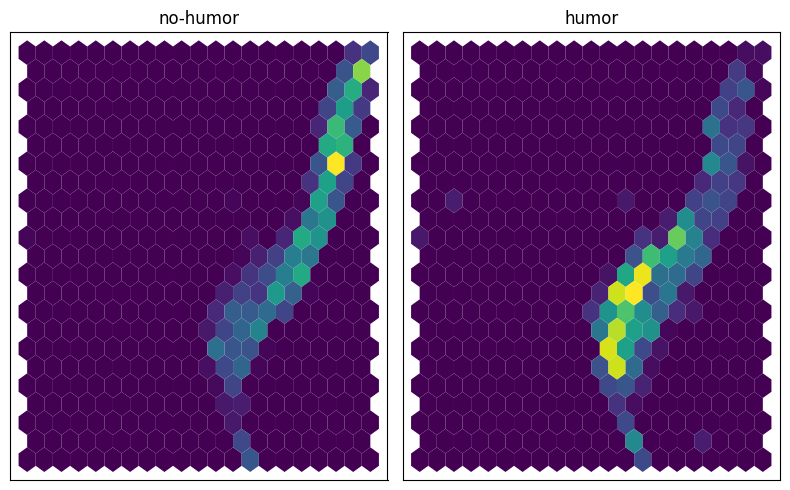

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = df["train"].features[CLASS_COL_ST1].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"{CLASS_COL_ST1} == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"],# cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
labels

['no-humor', 'humor']

In [ ]:
from sklearn.linear_model import LogisticRegression

# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=5000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8243992606284658

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.49907578558225507

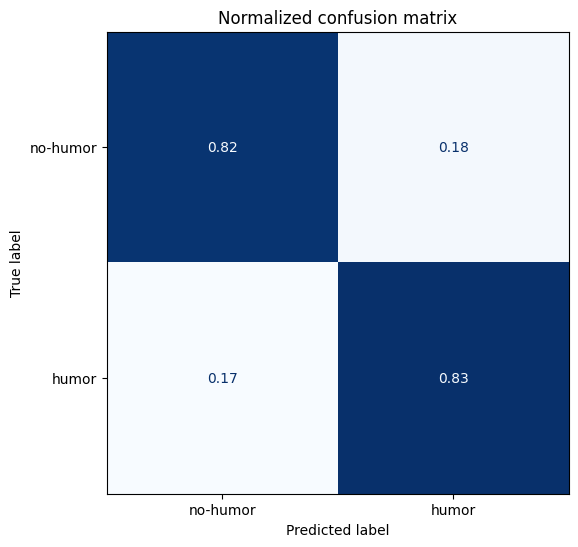

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_test)
plot_confusion_matrix(y_preds, y_test, labels)

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels, ignore_mismatched_sizes=True)
         .to(device))

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at citizenlab/twitter-xlm-roberta-base-sentiment-finetunned and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 72
logging_steps = len(tweets_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-huhu-local"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=20,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error",
                                  # NEW PARAMETERS THAT CAN BE ERASE
                                  # warmup_steps=500,                # number of warmup steps for learning rate scheduler
                                  #save_strategy='epoch',           # checkpoint save strategy
                                  #load_best_model_at_end=True,
                                  # greater_is_better=True,
                                  # gradient_accumulation_steps=2,   # number of updates steps to accumulate before performing a backward/update pass
                                  # fp16=True,
                                  # label_names = labels
                                  )

In [ ]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=tweets_encoded["train"],
                  eval_dataset=tweets_encoded["test"],
                  tokenizer=tokenizer)
trainer.train();

Cloning https://huggingface.co/csuazob/twitter-xlm-roberta-base-sentiment-finetunned-huhu-local into local empty directory.
/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.514100,0.388027,0.835490,0.835179
2,0.363100,0.332295,0.868762,0.868736
3,0.274000,0.304478,0.879852,0.879851
4,0.190300,0.324463,0.885397,0.885390
5,0.143000,0.358027,0.879852,0.879815
6,0.113500,0.331086,0.896488,0.896456
7,0.096500,0.376030,0.890943,0.890927
8,0.062000,0.427428,0.898336,0.898326
9,0.066100,0.394616,0.892791,0.892787
10,0.049200,0.455074,0.889094,0.889078


Adding files tracked by Git LFS: ['tokenizer.json']. This may take a bit of time if the files are large.


In [ ]:
preds_output = trainer.predict(tweets_encoded["test"])

In [ ]:
preds_output.metrics

{'test_loss': 0.5003759264945984,
 'test_accuracy': 0.9020332717190388,
 'test_f1': 0.9020145231952561,
 'test_runtime': 2.6553,
 'test_samples_per_second': 203.74,
 'test_steps_per_second': 3.013}

In [ ]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [ ]:
print(y_preds)

[1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1
 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0
 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1
 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1
 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1
 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0
 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1
 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1
 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0
 0 1 1 0 1 0 0 1 1 1 1 0 

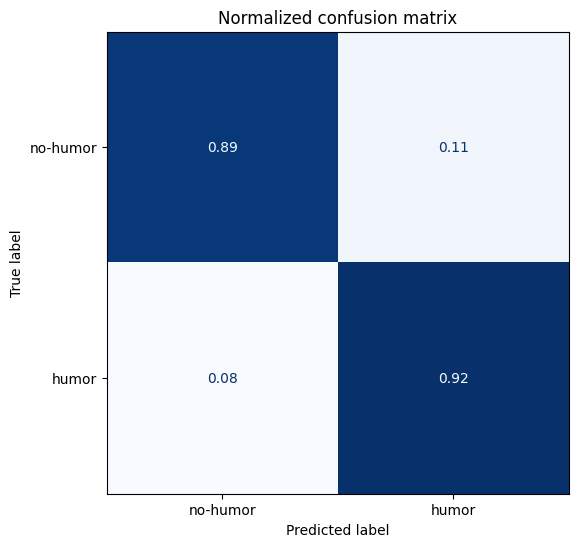

In [ ]:
plot_confusion_matrix(y_preds, y_test, labels)

In [ ]:
# calculate precision, recall, f1-score, and support
report = classification_report(y_test, y_preds, target_names=['NO-HUMOR', 'HUMOR'], digits=4)
print(report)

              precision    recall  f1-score   support

    NO-HUMOR     0.9125    0.8889    0.9006       270
       HUMOR     0.8921    0.9151    0.9035       271

    accuracy                         0.9020       541
   macro avg     0.9023    0.9020    0.9020       541
weighted avg     0.9023    0.9020    0.9020       541



In [ ]:
def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items() 
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch[CLASS_COL_ST1].to(device), 
                             reduction="none")

    # Place outputs on CPU for compatibility with other dataset columns   
    return {"loss": loss.cpu().numpy(), 
            "predicted_label": pred_label.cpu().numpy()}

In [ ]:
#hide_output
# Convert our dataset back to PyTorch tensors
tweets_encoded.set_format("torch", columns=["input_ids", "attention_mask", CLASS_COL_ST1])
# Compute loss values
tweets_encoded["test"] = tweets_encoded["test"].map(forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/541 [00:00<?, ? examples/s]

In [ ]:
tweets_encoded.set_format("pandas")
cols = ["text", CLASS_COL_ST1, "predicted_label", "loss"]
df_test = tweets_encoded["test"][:][cols]
df_test[CLASS_COL_ST1] = df_test[CLASS_COL_ST1].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

In [ ]:
#hide_output
df_test.sort_values("loss", ascending=False).head(10)

,text,labels,predicted_label,loss
122,"Ser ciego no es nada, peor sería ser negro. (S...",no-humor,humor,8.531100
201,"Si una mujer hace algo bien, la insulto.\n\nSi...",no-humor,humor,8.257641
219,"No intentes hacerte un mostopapi, el es el ne...",no-humor,humor,8.136060
108,Lo más sostenible es un bareto de barrio con e...,no-humor,humor,8.078169
249,Feministas: los hombres nos quieren calladas y...,humor,no-humor,8.048179
320,Son inmigrantes del estado de México..... Lo s...,humor,no-humor,7.758857
447,El casting de élite; tu gorda a anunciar embut...,humor,no-humor,7.739503
485,Acércate por los colegios a dar charlas enseñ...,no-humor,humor,7.689167
330,Compresas\n\n¿Sabes por que las mujeres de lep...,no-humor,humor,7.648221
101,Los errores te hacen más fuerte.\nLos novios d...,no-humor,humor,7.628826


In [ ]:
#hide_output
df_test.sort_values("loss", ascending=True).head(10)

,text,labels,predicted_label,loss
382,¿Por qué una mujer se queda mirando un sobresi...,humor,humor,0.000166
171,¿Por qué las mujeres casadas casi nunca se emb...,humor,humor,0.000172
213,-¡Hijo! ¿Por qué obtienes un pepino en tu tras...,humor,humor,0.000176
37,Excusas típicas de las mujeres para no tener s...,humor,humor,0.000176
170,Mencione el ácaro que los llamo cocos porque p...,humor,humor,0.000178
105,¿Por qué todos los judíos tendrían que llamars...,humor,humor,0.000181
386,Mencione si son lesbianas para decir: un paste...,humor,humor,0.000181
59,Un negro y un judío lanzan desde un quinto pis...,humor,humor,0.000182
104,"El hijo del papá: -papi, voy a volver! -Son, d...",humor,humor,0.000184
22,"¿Amor verdadero?\n\nUn amigo de otro, Pepe, tu...",humor,humor,0.000184


In [ ]:
#hide_output
trainer.push_to_hub(commit_message="Training completed!")

Upload file pytorch_model.bin:   0%|          | 1.00/1.04G [00:00<?, ?B/s]

Upload file runs/Apr03_14-37-45_f87b747b2993/events.out.tfevents.1680532677.f87b747b2993.280.0:   0%|         …

To https://huggingface.co/csuazob/twitter-xlm-roberta-base-sentiment-finetunned-huhu-local
   1ee1be1..7b69a07  main -> main

   1ee1be1..7b69a07  main -> main

To https://huggingface.co/csuazob/twitter-xlm-roberta-base-sentiment-finetunned-huhu-local
   7b69a07..52195b2  main -> main

   7b69a07..52195b2  main -> main



'https://huggingface.co/csuazob/twitter-xlm-roberta-base-sentiment-finetunned-huhu-local/commit/7b69a0765e6adc2bb14ba9609a442bb0c70265cc'